<h1>About the data</h1>
We have a collection of nominal and ordinal data from a survey given to students in a Math class.  The survey is scored on 1 to 5 for various variables.  There are also a number of nominal responses regarding students personal lives.  There is an anticipation that the nominal data will be less subject to error as the students aren't required to grade themselves on a scale and can use boolean responses, such as parents married or divorced or intend or don't intend to go to university.

The data can be downloaded from kaggle here.  We are using the Math classes data for this exploration:
https://www.kaggle.com/uciml/student-alcohol-consumption

<h1>Hypotheses</h1>
Given this set of data in regards to students grades, other life circumstances and activities.

We expect to see a negative relationship with the following factors:
1. Students who drink more will perform worse in school.
2. Students with mothers who work, and thus are not at home to supervise the children will perform worse in school.
3. Students who are in romantic relationships will perform worse in school.

We also expect to see a positive relationship with the following factors:
1. Students who engage in after-school activities, having a more structured life, will perform better in school.
2. Students who desire to attend further education after secondary school will perform better in school.

In [1]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import cprint
%matplotlib inline
df = pd.read_csv("/home/gierkep/google-drive/Datasets/Student Alcohol Consump/student-mat.csv", low_memory = False) 

In [2]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.shape #prints the shape of the dataframe

(395, 33)

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df.isnull().values.any()  #check for missing data

False

In [6]:
def checkp (type1, type2): 
    '''
    We used the Mann-Whitney test here for the following reasons:
    Mann-Whitney is a more robust test because it is less likely than the T-test to indicate significance due to
    the presence of outliers.  The Mann-Whitney test has a 0.95 efficiency when compared to the t-test and for 
    non-normalized distributions, which our datasets could be, or larger distributions the Mann-Whitney test is
    considerably more efficient.
    '''

    ptest = scipy.stats.mannwhitneyu(type1['G3'], type2['G3']).pvalue 
    print('Mann-Whitney', 'G3', scipy.stats.mannwhitneyu(type1['G3'], type2['G3']))
    if ptest > 0.05:
        cprint("The pvalue is greater than 0.05 indicating the null hypothesis", 'red') #prints evaluation of pvalue
    else:
        cprint("The pvalue is less than 0.05 so we reject the null hypothesis", 'green') #prints evaluation of pvalue

In [7]:
def histvsdata(set1,set1title, set2,set2title, plottitle,plotdata):
    plt.figure(figsize=(5,10))
    plt.subplot(2, 1, 1)
    plt.hist(set1[plotdata], label = set1title, alpha = 0.5, normed = True)
    plt.axvline(set1[plotdata].mean(), color='b', linestyle='solid', linewidth=2)
    plt.title(plottitle)
    plt.hist(set2[plotdata], label = set2title, alpha = 0.5, normed = True)
    plt.axvline(set2[plotdata].mean(), color='g', linestyle='solid', linewidth=2)
    plt.legend(loc='upper left')
    plt.show()

<h1>Analysis</h1>
Let's start with a heatmap to see what correlations we might see from the ordinal survey data.  According to our hypothesis we should see 

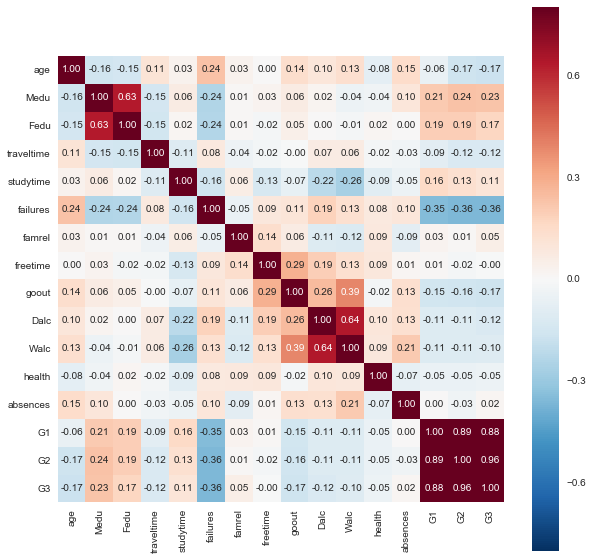

In [8]:
corrmat = df.corr(method='spearman') #use spearman method because all the data is ordinal
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

Unfortunately, there are no obvious answers that we can get out of the data as the only strong correlations using the surveys where students gave answers between 1 and 5 for various questions relate to parental education and week drinking compared to weekend drinking.  So to get answers we will have to look at the questions that weren't ranked 1-5.  The lack of information we are getting out of the survey scale questions could be due to students not ranking the categories honestly or not really knowing how to compare themselves to other people.  However, it is surprising that drinking doesn't seem to affect student performance, so before we go further let's take a look at the data on this a little more deeply.

In [9]:
df['Dalc'].unique() #Dalc us a 1-5 ranked scale of workday drinking habits

array([1, 2, 5, 3, 4])

In [10]:
df['Dalc'].mean()

1.481012658227848

In [11]:
drinksaboveavg = df[df['Dalc']>=df['Dalc'].mean()] #create dataframe of the above average workday drinkers
drinksaboveavg.name = 'drinksaboveavg'
drinksbelowavg = df[df['Dalc']<df['Dalc'].mean()] #create dataframe of the below average workday drinkers
drinksbelowavg.name = 'drinksbelowavg'
checkp(drinksbelowavg,drinksaboveavg)

Mann-Whitney G3 MannwhitneyuResult(statistic=13763.5, pvalue=0.0051761234196521753)
The pvalue is less than 0.05 so we reject the null hypothesis


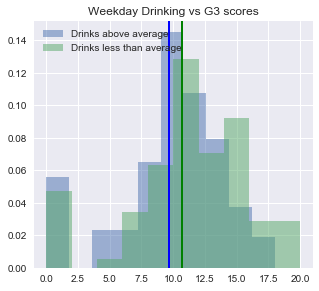

In [12]:
histvsdata(drinksaboveavg, 'Drinks above average', 
         drinksbelowavg, 'Drinks less than average', 
         'Weekday Drinking vs G3 scores',
        'G3')

We added verticle lines at the means of the two datasets to help visualize the differences between the two.  Mean was chosen as the total range is small, from 1-20 and the possibility for extreme outliers is low.  While it is helpful in the above visualization, the trend of those who drink below average performing better than those who drink above average is clear without the means.

Let's look at weekend drinking habits.

In [13]:
df['Walc'].unique()  #Walc us a 1-5 ranked scale of weekend drinking habits

array([1, 3, 2, 4, 5])

In [14]:
df['Walc'].mean()

2.2911392405063293

Students drink more on weekends on the whole, but does this affect their grades?

In [15]:
drinksaboveavgwd = df[df['Walc']>=df['Walc'].mean()] #create dataframe of the above average weekend drinkers
drinksaboveavgwd.name = 'drinksaboveavgweekend'
drinksbelowavgwd = df[df['Walc']<df['Walc'].mean()] #create dataframe of the below average weekend drinkers
drinksbelowavgwd.name = 'drinksbelowavgweekend'
checkp(drinksbelowavg,drinksaboveavg)

Mann-Whitney G3 MannwhitneyuResult(statistic=13763.5, pvalue=0.0051761234196521753)
The pvalue is less than 0.05 so we reject the null hypothesis


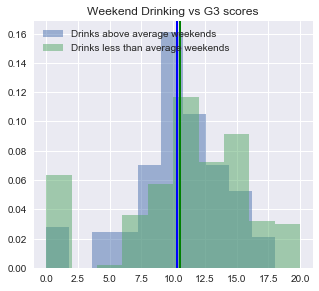

In [16]:
histvsdata(drinksaboveavgwd, 'Drinks above average weekends', 
         drinksbelowavgwd, 'Drinks less than average weekends', 
         'Weekend Drinking vs G3 scores',
        'G3')

From the Mann-Whitney test and the means of the students responses above their drinking habits we can conclude that drinking  negatively affects school performance.  We assume that this right aligned histogram also suggests that students who don't drink do better in school than those who do.  

However, we also note students who don't drink on the weekends are more likely to fail than those that don't. We assume that it may be related to lack of social life and associated depression.  But we have no data that we can use to further evaluate.

The next hypothesis we had was that students with mothers who work will not perform in school as well due to a lack of parental supervision at home.  Let's investigate this date.  As the data on this is nominal we can't make any initial assumptions from a heatmap on this so well have to start with the Mann-Whitney test.

In [17]:
df['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [18]:
stayathomemom = df[df['Mjob']=='at_home'] #create a dataframe of students where the mother is a stay at home mom
stayathomemom.name = 'stayathomemom'
notstayathomemom = df[df['Mjob']!='at_home'] #create a dataframe of students where the mother is a working mom
notstayathomemom.name = 'notstayathomemom'

checkp(stayathomemom,notstayathomemom)    #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Mann-Whitney G3 MannwhitneyuResult(statistic=8056.5, pvalue=0.010636795350218518)
The pvalue is less than 0.05 so we reject the null hypothesis


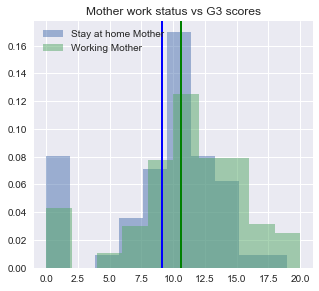

In [19]:
histvsdata(stayathomemom, 'Stay at home Mother', 
         notstayathomemom, 'Working Mother', 
         'Mother work status vs G3 scores',
          'G3')

The Mann-Whitney test suggests correlation between a mother's working status and a students performance in school.  However, unexpectedly, students with mothers who work do better in school than students whose mothers stay at home.  We tend to hypothesize that rather than being home to monitor the students behavior that students do better in school when their mothers are a working role model. 

Personal life of a student seems to be affecting his/her school performance differently than we expected.

Let's take a quick look at how different jobs held by mothers affect student performance.

In [83]:
from scipy.stats import mstats

Grp_1 = df[df['Mjob']=='at_home']['G3'] #Filter student performance for mothers with no job
Grp_2 = df[df['Mjob']=='health']['G3'] #Filter student performance for mothers working in healthcare
Grp_3 = df[df['Mjob']=='other']['G3'] #Filter student performance for mothers  working in other
Grp_4 = df[df['Mjob']=='services']['G3'] #Filter student performance for mothers working in services
Grp_5 = df[df['Mjob']=='teacher']['G3'] #Filter student performance for mothers working in education

print("Kruskal Wallis H-test test:")

#Since we are dealing with more than two datasets well use Kruskal-Willis to test for significance
H, pval = mstats.kruskalwallis(Grp_1, Grp_2, Grp_3, Grp_4, Grp_5)

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    cprint("Reject NULL hypothesis - Significant differences exist between groups.",'green')
if pval > 0.05:
    cprint("Accept NULL hypothesis - No significant difference between groups.", 'red')

Kruskal Wallis H-test test:
H-statistic: 16.127353493
P-Value: 0.00285294955904
Reject NULL hypothesis - Significant differences exist between groups.


From the Kruskal-Willis test we can see that significant differences exist between student performance based on mothers employment choice

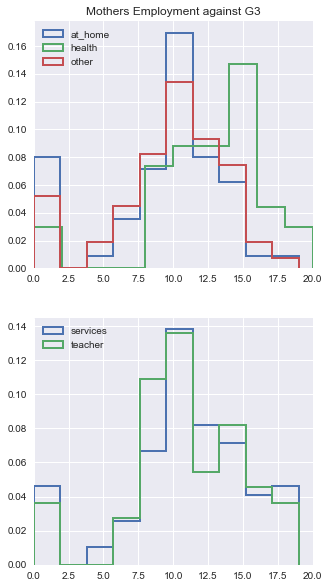

In [86]:
    plt.figure(figsize=(5,10))
    
    plt.subplot(2, 1, 1)
    plt.title('Mothers Employment against G3')
    plt.xlim(0, 20)
    plt.hist(Grp_1, label = 'at_home', normed = True, fill=False, histtype='step', linewidth = 2)
    plt.hist(Grp_2, label = 'health', normed = True, fill= False, histtype='step', linewidth = 2)
    plt.hist(Grp_3, label = 'other', normed = True, fill= False, histtype='step', linewidth = 2)
    plt.legend(loc='upper left')
    
    plt.subplot(2, 1, 2)    
    plt.xlim(0, 20)
    plt.hist(Grp_4, label = 'services', normed = True, fill= False, histtype='step', linewidth = 2)
    plt.hist(Grp_5, label = 'teacher', normed = True, fill= False, histtype='step', linewidth = 2)
    plt.legend(loc='upper left')
    
    plt.show()

From the above histograms we can see that a mothers choice of employment has a large impact on student perfofmance.  Students with mothers in healthcare especially perform much better than students with mothers in other employment.  Students with mothers in the education and services sector also performed better than students with mothers in the other category, as well as stay at home mothers, which we saw before.

We expected a positive relationship between student performance and their after school activities.  We tried the following test to validate the hypothesis.

In [20]:
df['activities'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
aftrschlactive = df[df['activities']=='yes']  #create a dataframe where students have after school activities
aftrschlactive.name = 'aftrschlactive'
noaftrschlactive = df[df['activities']=='no'] #create a dataframe where students dont have after school activities
noaftrschlactive.name = 'noaftrschlactive'

checkp(aftrschlactive,noaftrschlactive)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Mann-Whitney G3 MannwhitneyuResult(statistic=18912.0, pvalue=0.30242913731309184)
The pvalue is greater than 0.05 indicating the null hypothesis


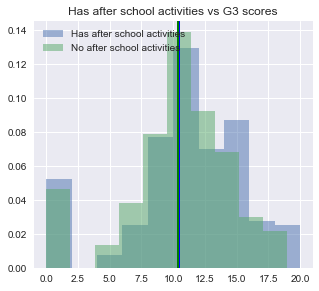

In [22]:
histvsdata(aftrschlactive, 'Has after school activities', 
         noaftrschlactive, 'No after school activities', 
         'Has after school activities vs G3 scores',
        'G3')

Surprisingly after school activities seems to have no impact on student performance.  Null hypothesis accepted.

Let's check for other ways personal life can affect student performance, starting with whether or not students are involved in a romantic relationship and how this affects their final grades.

In [23]:
df['romantic'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
romantic = df[df['romantic']=='yes']  #create a dataframe where students have romantic relationships
romantic.name = 'romantic'
noromantic = df[df['romantic']=='no'] #create a dataframe where students dont have romantic relationships
noromantic.name = 'noromantic'

checkp(romantic,noromantic)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Mann-Whitney G3 MannwhitneyuResult(statistic=15423.0, pvalue=0.034764992940804075)
The pvalue is less than 0.05 so we reject the null hypothesis


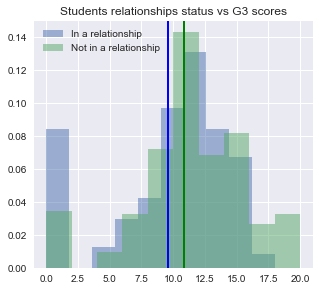

In [25]:
histvsdata(romantic, 'In a relationship', 
         noromantic, 'Not in a relationship', 
         'Students relationships status vs G3 scores',
        'G3')

There is strong evidence that a students relationship status can affect their performance in school.  Not only are children in relationships less likely to do well in school, but the rate of failure in school for students with significant others is far higher than those without. Overall we can see from the Mann-Whitney test and the means that students not in a romantic relationship do better than those in a relationship.


In [26]:
df['higher'].unique()

array(['yes', 'no'], dtype=object)

In [27]:
wantshigher = df[df['higher']=='yes']  #create a dataframe where students want to get higher education
wantshigher.name = 'wantshigher'
nohigherdesire = df[df['higher']=='no'] #create a dataframe where students dont want to get higher education
nohigherdesire.name = 'nohigherdesire'

checkp(wantshigher,nohigherdesire)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Mann-Whitney G3 MannwhitneyuResult(statistic=2054.5, pvalue=0.00031151174435305943)
The pvalue is less than 0.05 so we reject the null hypothesis


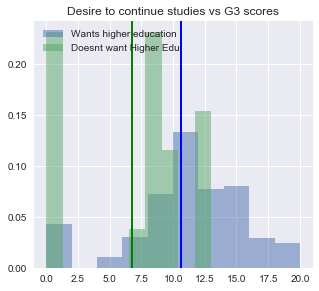

In [28]:
histvsdata(wantshigher, 'Wants higher education', 
         nohigherdesire, 'Doesnt want Higher Edu', 
         'Desire to continue studies vs G3 scores',
        'G3')

This is probably the strongest metric we have seen so far, students who want to continue going to school after secondary school is more likely to succeed than students who don't, which is common sense.  Students who want to do well will try harder, regardless of what their survey responses say the amount they drink or the amount of free time they have.

<h1> Conclusion</h1>
So to recap, here are our original hypotheses, followed by our conclusions from the results.

1. Students who drink more will perform worse in school.
    <p style="color:Green";>POSITIVE RESULT: after schoolWe found that students who drink do worse in school than students who don't. Null hypothesis rejected.
2. Students with mothers who work, and thus are not at home to supervise the children will perform worse in school.
    <p style="color:Red";>OPPOSITE RESULT:We were incorrect.  The opposite was true.  Students with working mothers performed better in school.  
3. Students who are in romantic relationships will perform worse in school.
    <p style="color:Green";>POSITIVE RESULT: Students in relationships perform significantly worse in school than students not in a relationship.

We also expect to see a positive relationship with the following factors:
1. Students with after-school activities, having a more structured life, will perform better in school.
    <p style="color:Red";>NULL RESULT: There was almost no correlation between after school activities and either negative or positive performance.  Null hypothesis accepted.
2. Students who desire to attend further education after secondary school will perform better in school.
    <p style="color:Green";>POSITIVE RESULT: We found an overwhelmingly positive correlation between the desire to attend more school after completing secondary school with higher performance in class.  
    
    It is worth noting that some of the sample sets for certain groups were very small and that those sample sets might not be a good representation of a larger group of similar students.
    
    In 60% of our cases our assumptions remained valid.  This indicates need for further analysis.  Things we could further analize are:
       1. The size of the data sets involved in the study.
       2. Interaction between multiple variables and the effects on performance, such as students who have working mothers and are in a relationship.